# House Price Prediction

Submitted By: **Ashok Deb**

## Task 1: Data Preprocessing

### Importing the dataset 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("house-prices.csv")
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


### Cleaning the dataset 

In [3]:
# drop column
df.drop(columns=['Home'],axis=1 , inplace=True)

In [4]:
# handle missing value
df.isnull().sum()

Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

In [5]:
# handle duplicates
df.duplicated().sum()

0

### Handling outliers 

In [6]:
df.shape

(128, 7)

In [7]:
from scipy import stats
cols = ['Price','SqFt','Bedrooms','Bathrooms','Offers']
z = np.abs(stats.zscore(df[cols]))
threshold = 2
print(np.where(z > threshold))

(array([ 13,  14,  28,  29,  33,  40,  47,  65,  81,  84,  85,  96, 100,
       101, 103, 103, 105, 116, 116, 116], dtype=int64), array([4, 1, 0, 0, 2, 1, 4, 1, 0, 1, 0, 1, 4, 4, 0, 1, 1, 0, 2, 3],
      dtype=int64))


In [8]:
# Removing outliers
df = df[(z < threshold).all(axis=1)]
df.shape

(111, 7)

### Encoding categorical data 

In [9]:
df['Neighborhood'].unique()

array(['East', 'North', 'West'], dtype=object)

In [10]:
df['Brick'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_df = df.copy(deep=False)

In [12]:
encoded_df['Brick'] = le.fit_transform(encoded_df['Brick'])
encoded_df['Neighborhood'] = le.fit_transform(encoded_df['Neighborhood'])

In [13]:
encoded_df.head(10)

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,0,0
1,114200,2030,4,2,3,0,0
2,114800,1740,3,2,1,0,0
3,94700,1980,3,2,3,0,0
4,119800,2130,3,3,3,0,0
5,114600,1780,3,2,2,0,1
6,151600,1830,3,3,3,1,2
7,150700,2160,4,2,2,0,2
8,119200,2110,4,2,3,0,0
9,104000,1730,3,3,3,0,0


### Handling numerical features using Standard Scaling 

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
scaled_features = scaler.fit_transform(encoded_df)
scaled_df = pd.DataFrame(scaled_features, columns=encoded_df.columns)
scaled_df.head(5)

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,-0.631010,-1.119816,-1.465628,-0.825723,-0.528017,-0.664499,-1.13883
1,-0.635335,0.246739,1.547052,-0.825723,0.537617,-0.664499,-1.13883
2,-0.609382,-1.404514,0.040712,-0.825723,-1.593651,-0.664499,-1.13883
3,-1.478799,-0.037960,0.040712,-0.825723,0.537617,-0.664499,-1.13883
4,-0.393110,0.816137,0.040712,1.211060,0.537617,-0.664499,-1.13883


### Splitting the dataset 

In [16]:
X = scaled_df.iloc[:,1:]
y =scaled_df.iloc[:,0]

In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state = 0)

## Task 2: Exploratory Data Analysis (EDA)

### Exploring the dataset 

In [18]:
# Display the first few rows of the dataset
df.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,No,East
1,114200,2030,4,2,3,No,East
2,114800,1740,3,2,1,No,East
3,94700,1980,3,2,3,No,East
4,119800,2130,3,3,3,No,East


In [19]:
# Display basic statistics for numerical columns
df.describe()

,Price,SqFt,Bedrooms,Bathrooms,Offers
count,111.000000,111.000000,111.000000,111.000000,111.000000
mean,128888.288288,1986.666667,2.972973,2.405405,2.495495
std,23223.807294,176.420641,0.666871,0.493197,0.942664
min,81300.000000,1610.000000,2.000000,2.000000,1.000000
25%,111950.000000,1880.000000,3.000000,2.000000,2.000000
50%,125700.000000,1990.000000,3.000000,2.000000,3.000000
75%,147400.000000,2110.000000,3.000000,3.000000,3.000000
max,182000.000000,2420.000000,4.000000,3.000000,4.000000


In [20]:
# Display data types and non-null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 127
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         111 non-null    int64 
 1   SqFt          111 non-null    int64 
 2   Bedrooms      111 non-null    int64 
 3   Bathrooms     111 non-null    int64 
 4   Offers        111 non-null    int64 
 5   Brick         111 non-null    object
 6   Neighborhood  111 non-null    object
dtypes: int64(5), object(2)
memory usage: 6.9+ KB


In [21]:
# Explore unique values in categorical columns
print("\nUnique values in categorical columns:")
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"{column}: {df[column].unique()}")


Unique values in categorical columns:
Brick: ['No' 'Yes']
Neighborhood: ['East' 'North' 'West']


In [22]:
# Explore the correlation between numerical features
print("\nCorrelation between numerical features:")
correlation_matrix = df.corr()
print(correlation_matrix)


Correlation between numerical features:
              Price      SqFt  Bedrooms  Bathrooms    Offers
Price      1.000000  0.481790  0.401716   0.425601 -0.343067
SqFt       0.481790  1.000000  0.339992   0.436731  0.304114
Bedrooms   0.401716  0.339992  1.000000   0.282381  0.122726
Bathrooms  0.425601  0.436731  0.282381   1.000000  0.189724
Offers    -0.343067  0.304114  0.122726   0.189724  1.000000


C:\Users\hp\AppData\Local\Temp\ipykernel_8056\4002690302.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [23]:
# Explore the distribution of a specific columns
for col in df.columns:
    target_column = col
    print(f"\nDistribution of {target_column}:")
    print(df[target_column].value_counts())
    


Distribution of Price:
117800    2
125700    2
105600    2
129800    2
143600    1
         ..
147000    1
117500    1
117100    1
135000    1
124600    1
Name: Price, Length: 107, dtype: int64

Distribution of SqFt:
2000    5
1920    5
1930    5
1990    4
1900    4
2080    4
2150    3
2160    3
2110    3
1780    3
1910    3
2190    3
2130    3
1700    3
1740    3
2250    3
2040    2
1860    2
1650    2
1790    2
2140    2
1950    2
1940    2
2410    2
2010    2
2060    2
2100    2
1720    2
1840    2
2030    2
1880    2
1980    2
2210    2
1870    1
2070    1
1710    1
1890    1
1970    1
1830    1
1730    1
2050    1
2280    1
1820    1
1690    1
1810    1
2220    1
1610    1
2200    1
2090    1
2240    1
2290    1
2420    1
2020    1
Name: SqFt, dtype: int64

Distribution of Bedrooms:
3    62
2    26
4    23
Name: Bedrooms, dtype: int64

Distribution of Bathrooms:
2    66
3    45
Name: Bathrooms, dtype: int64

Distribution of Offers:
3    42
2    34
1    19
4    16
Name: Offers, dt

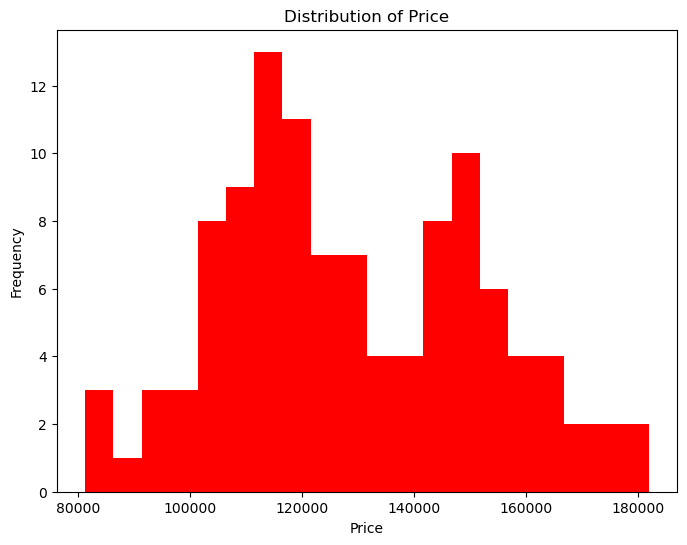

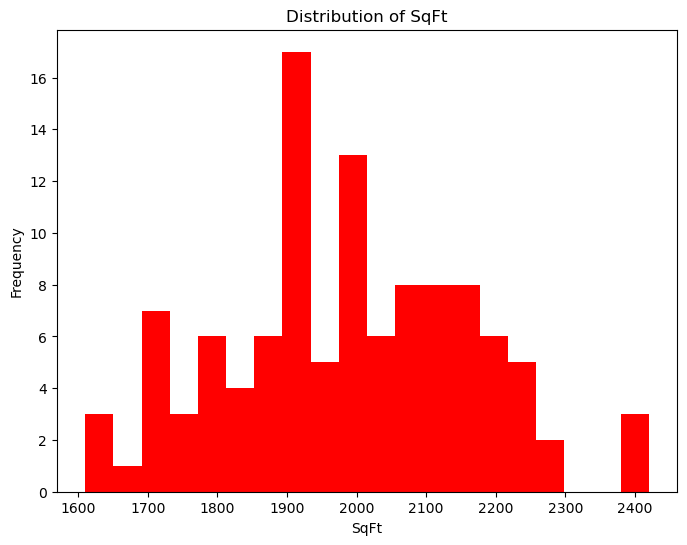

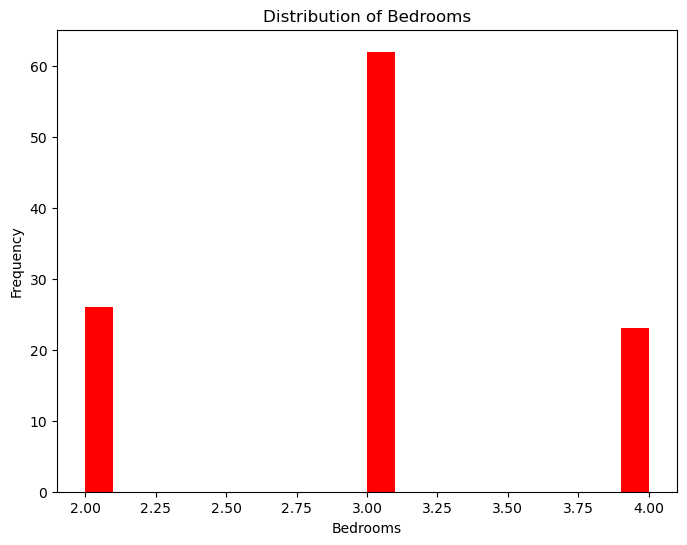

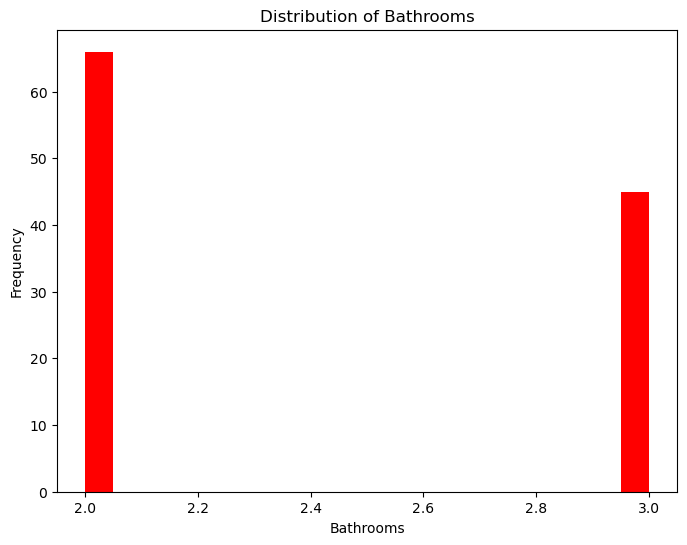

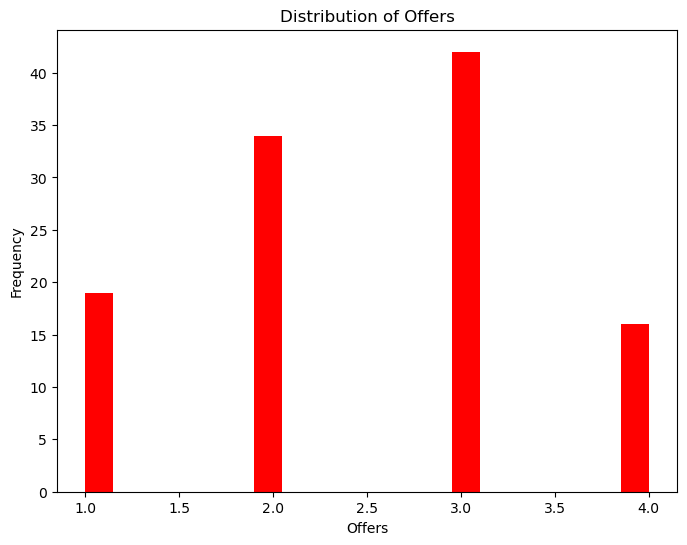

In [24]:
# Explore the distribution of numerical features using histograms
import matplotlib.pyplot as plt

numerical_columns = df.select_dtypes(include=['int', 'float']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    df[column].plot(kind='hist', bins=20 , color='red')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### Visualizing house prices 

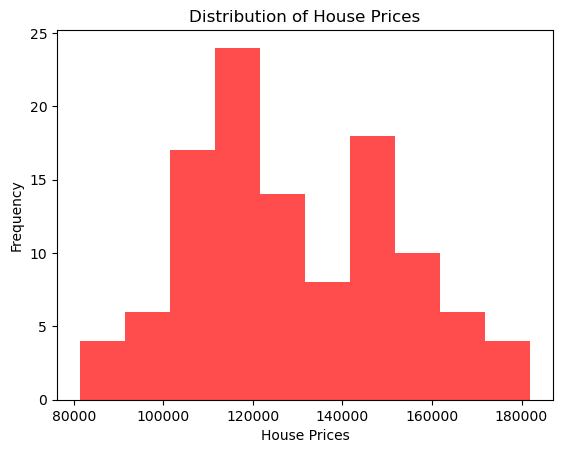

In [25]:

# Create a histogram
plt.hist(df['Price'], bins=10, color='red', alpha=0.7)

# Add labels and a title
plt.xlabel('House Prices')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')

# Show the histogram
plt.show()


### Investing the relationships between features and house prices 

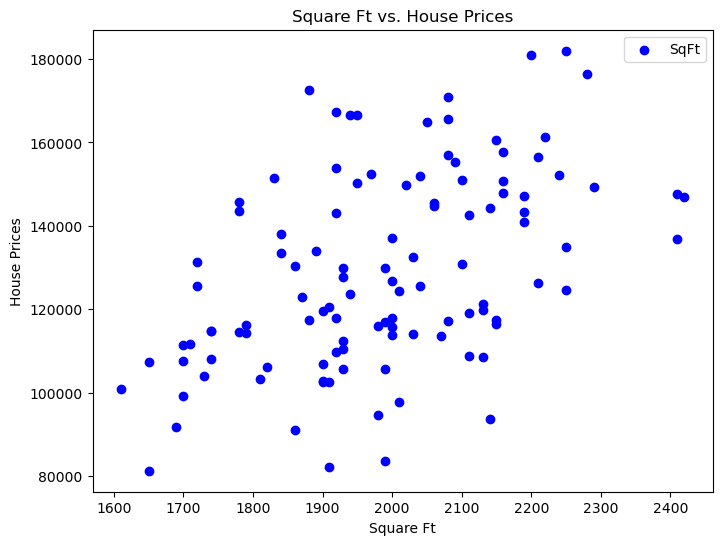

In [26]:
# Create a scatter plot for SqFt vs. house prices
plt.figure(figsize=(8, 6))
plt.scatter(df['SqFt'], df['Price'], c='blue', label='SqFt')
plt.xlabel('Square Ft')
plt.ylabel('House Prices')
plt.title('Square Ft vs. House Prices')
plt.legend()

# Show the scatter plot
plt.show()

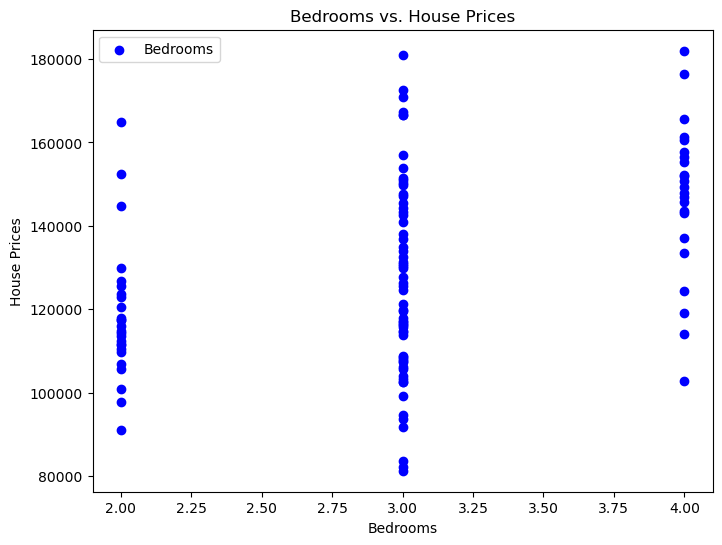

In [27]:
# Create a scatter plot for Bedrooms vs. house prices
plt.figure(figsize=(8, 6))
plt.scatter(df['Bedrooms'], df['Price'], c='blue', label='Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('House Prices')
plt.title('Bedrooms vs. House Prices')
plt.legend()

# Show the scatter plot
plt.show()

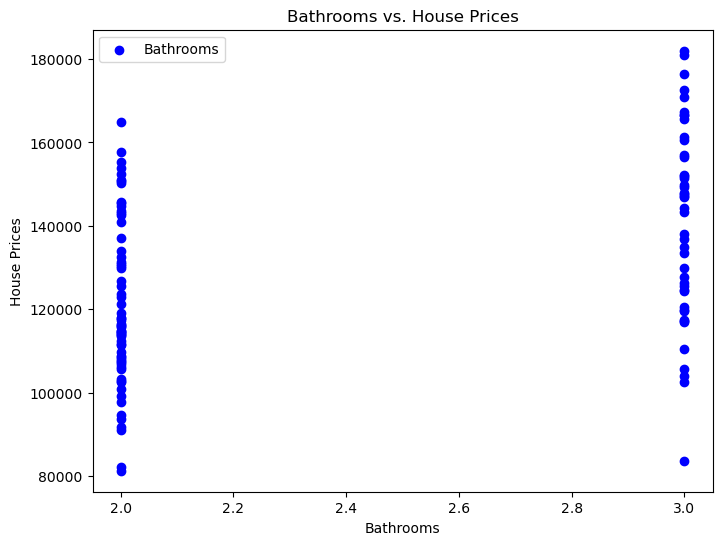

In [28]:
# Create a scatter plot for Bathrooms vs. house prices
plt.figure(figsize=(8, 6))
plt.scatter(df['Bathrooms'], df['Price'], c='blue', label='Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('House Prices')
plt.title('Bathrooms vs. House Prices')
plt.legend()

# Show the scatter plot
plt.show()

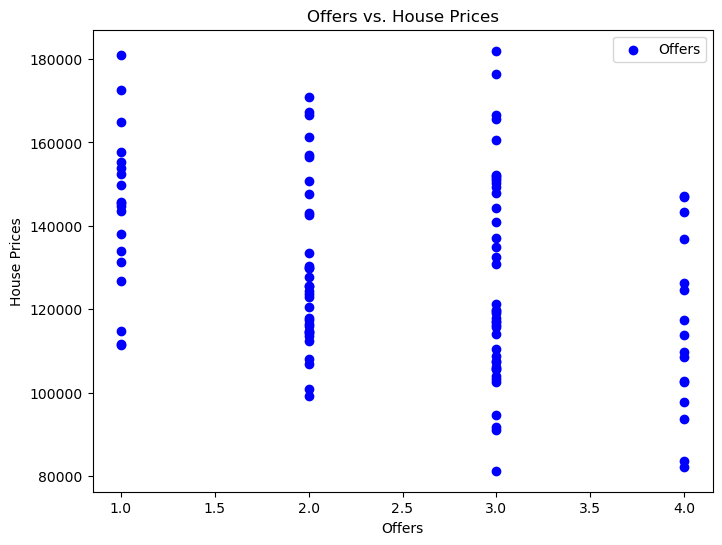

In [29]:
# Create a scatter plot for Offers vs. house prices
plt.figure(figsize=(8, 6))
plt.scatter(df['Offers'], df['Price'], c='blue', label='Offers')
plt.xlabel('Offers')
plt.ylabel('House Prices')
plt.title('Offers vs. House Prices')
plt.legend()

# Show the scatter plot
plt.show()

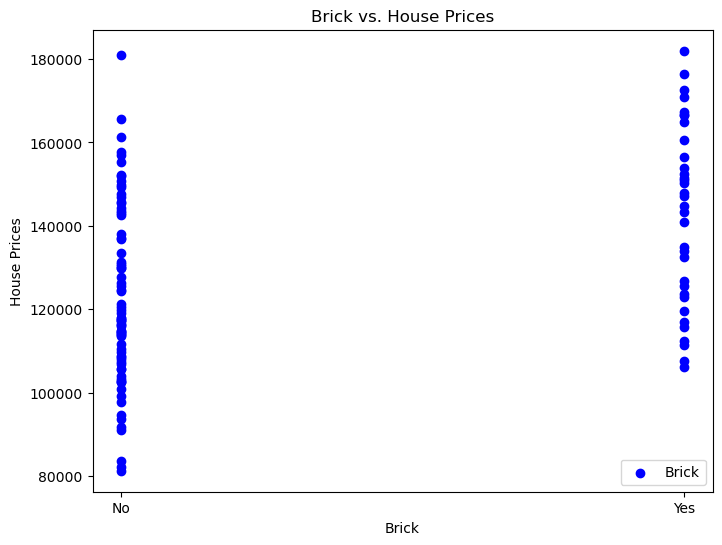

In [30]:
# Create a scatter plot for Offers vs. house prices
plt.figure(figsize=(8, 6))
plt.scatter(df['Brick'], df['Price'], c='blue', label='Brick')
plt.xlabel('Brick')
plt.ylabel('House Prices')
plt.title('Brick vs. House Prices')
plt.legend()

# Show the scatter plot
plt.show()

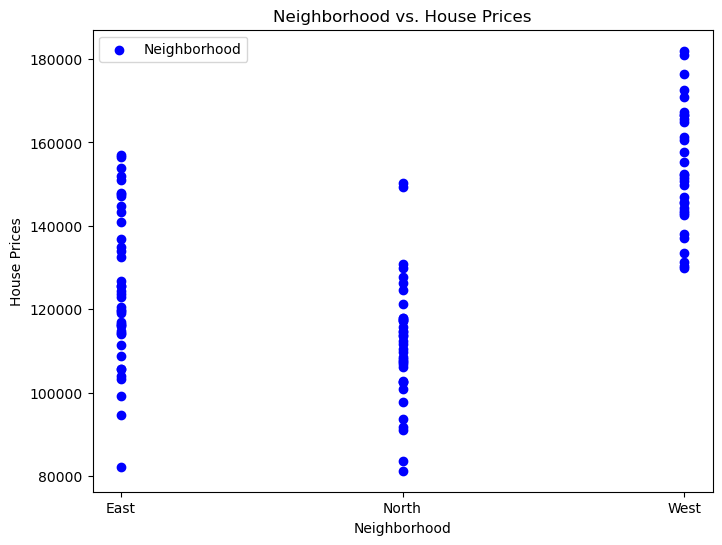

In [31]:
# Create a scatter plot for Offers vs. house prices
plt.figure(figsize=(8, 6))
plt.scatter(df['Neighborhood'], df['Price'], c='blue', label='Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('House Prices')
plt.title('Neighborhood vs. House Prices')
plt.legend()

# Show the scatter plot
plt.show()

### Most Important Features

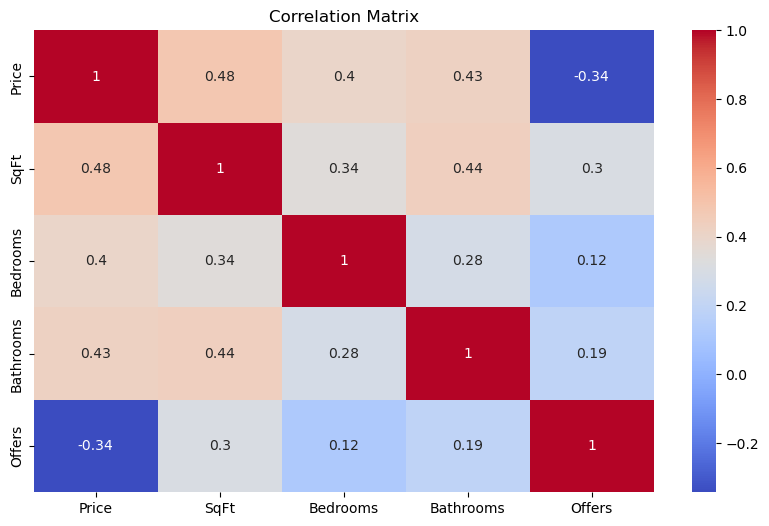

In [32]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [33]:
data_series = correlation_matrix['Price'].sort_values(ascending=False)
print(data_series)


Price        1.000000
SqFt         0.481790
Bathrooms    0.425601
Bedrooms     0.401716
Offers      -0.343067
Name: Price, dtype: float64


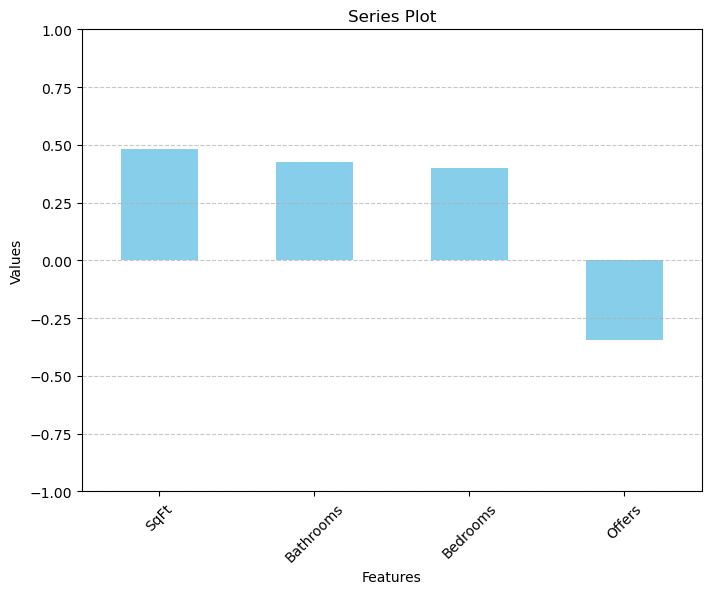

In [34]:
# Remove 'Price' from the Series
data_series = data_series.drop('Price')

# Create a bar plot
plt.figure(figsize=(8, 6))
data_series.plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Series Plot')
plt.ylim([-1, 1]) 
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Insights and Observations based on the EDA 

1. There are no missing values.
2. There are no duplicates.
3. Outliers were handled.
4. Distribution of the properties were visualised.
5. Scatter plots gives the relationship between different features and Prices.
6. From the correlation matrix offers is found to have negative correlation.
7. SqFt have more influence

## Task 3: Model Building

In [35]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

#### Training and Evaluating using Linear Regression 

In [36]:
# Linear Regression
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred_lr = linear_regressor.predict(X_test)

In [38]:
# Calculate Mean Absolute Error (MAE) for Linear Regressor Model
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Calculate R-squared (R^2)
r_squared_lr = r2_score(y_test, y_pred_lr)

# Calculate Root Mean Squared Error (RMSE)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))


# Print the evaluation metrics
print(f"Mean Absolute Error (MAE) for Linear Regressor Model: {mae_lr:.4f}")
print(f"R-squared (R^2) for Linear Regressor Model: {r_squared_lr:.4f}")
print(f"Root Mean Squared Error (RMSE) for Linear Regressor Model: {rmse_lr:.4f}")


Mean Absolute Error (MAE) for Linear Regressor Model: 0.3939
R-squared (R^2) for Linear Regressor Model: 0.8103
Root Mean Squared Error (RMSE) for Linear Regressor Model: 0.4867


####  Training and Evaluating using Decision Tree Regression

In [39]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state=0)
decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [40]:
y_pred_dtr = decision_tree_regressor.predict(X_test)

In [41]:
# Calculate Mean Absolute Error (MAE) for Decision Tree Regressor Model
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)

# Calculate R-squared (R^2)
r_squared_dtr = r2_score(y_test, y_pred_dtr)

# Calculate Root Mean Squared Error (RMSE)
rmse_dtr = np.sqrt(mean_squared_error(y_test, y_pred_dtr))



# Print the evaluation metrics
print(f"Mean Absolute Error (MAE) for Decision Tree Regressor Model: {mae_dtr:.4f}")
print(f"R-squared (R^2) for Decision Tree Regressor Model: {r_squared_dtr:.4f}")
print(f"Root Mean Squared Error (RMSE) for Decision Tree Regressor Model: {rmse_dtr:.4f}")


Mean Absolute Error (MAE) for Decision Tree Regressor Model: 0.4596
R-squared (R^2) for Decision Tree Regressor Model: 0.7314
Root Mean Squared Error (RMSE) for Decision Tree Regressor Model: 0.5790


#### Training and Evaluating using Random Forest Regression 

In [42]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_estimators = 10 , random_state = 0)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [43]:
y_pred_rfr = random_forest_regressor.predict(X_test)

In [44]:
# Calculate Mean Absolute Error (MAE) for Random Forest Regressor Model
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)

# Calculate R-squared (R^2)
r_squared_rfr = r2_score(y_test, y_pred_rfr)

# Calculate Root Mean Squared Error (RMSE)
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))



# Print the evaluation metrics
print(f"Mean Absolute Error (MAE) for Random Forest Regressor Model: {mae_rfr:.4f}")
print(f"R-squared (R^2) for Random Forest Regressor Model: {r_squared_rfr:.4f}")
print(f"Root Mean Squared Error (RMSE) for Random Forest Regressor Model: {rmse_rfr:.4f}")


Mean Absolute Error (MAE) for Random Forest Regressor Model: 0.4361
R-squared (R^2) for Random Forest Regressor Model: 0.7798
Root Mean Squared Error (RMSE) for Random Forest Regressor Model: 0.5242


### Hyperparameter tuning on Decision Tree Regressor 

In [45]:

from sklearn.model_selection import  GridSearchCV


# Define hyperparameter grid for tuning
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

model = decision_tree_regressor
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)



Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5}


In [46]:
# Use the best model to make predictions on the test data
best_model = grid_search.best_estimator_
y_pred_dtr_tuned = best_model.predict(X_test)

# Calculate Root Mean Squared Error (RMSE) for tuned  model
rmse_dtr_tuned = np.sqrt(mean_squared_error(y_test, y_pred_dtr_tuned)) 


print(f"Root Mean Squared Error (RMSE) for Prev Model: {rmse_dtr :.4f}")
print(f"Root Mean Squared Error (RMSE) for Tuned Model: {rmse_dtr_tuned :.4f}")


Root Mean Squared Error (RMSE) for Prev Model: 0.5790
Root Mean Squared Error (RMSE) for Tuned Model: 0.5787


The decrease of RMSE after hypertuning means an improvement in the model's predictive performance

### Comparing and selecting the best performing model

We use rmse calculated as the metric to compare our models

In [47]:

# model names along with calculated rmse
models = {
    'Linear Regression': rmse_lr,
    'Decision Tree': rmse_dtr,
    'Decision Tree(Tuned)': rmse_dtr_tuned,
    'Random Forest' : rmse_rfr
}

In [48]:
results = {}

for model_name, rmse in models.items():
    
    results[model_name] = {'RMSE': rmse}

# Compare model performance
performance_df = pd.DataFrame.from_dict(results, orient='index')
print("Model Performance RMSE Metrics:")
print(performance_df)


Model Performance RMSE Metrics:
                          RMSE
Decision Tree         0.579048
Decision Tree(Tuned)  0.578717
Linear Regression     0.486662
Random Forest         0.524245


In [49]:
# Select the best-performing model based on a chosen metric (e.g., RMSE)
best_model_name = performance_df['RMSE'].idxmin()
best_model = models[best_model_name]

print(f"The best-performing model is: {best_model_name}")

The best-performing model is: Linear Regression


Hence, we carry on with Linear Regression for further processes

### Visualizing the predictions of the Linear Regression Model 

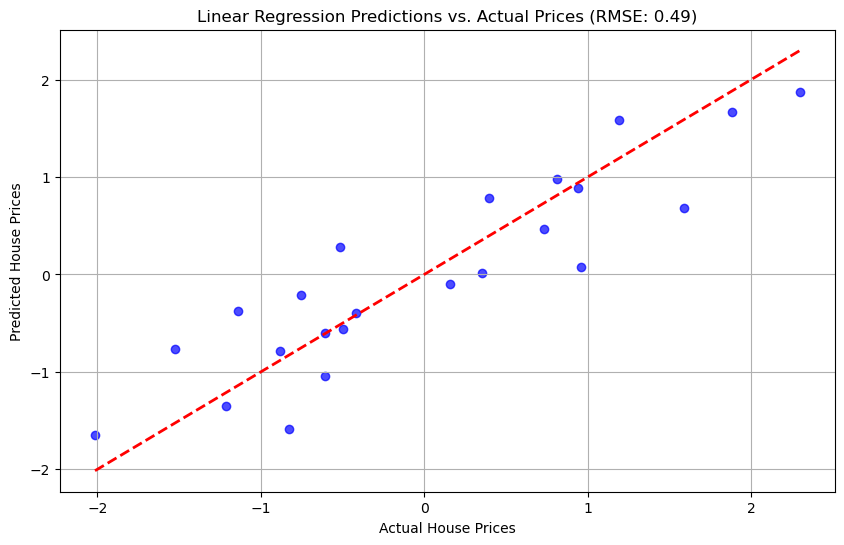

In [50]:
# Visualize predictions vs. actual house prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, c='blue', marker='o', alpha=0.7)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title(f"Linear Regression Predictions vs. Actual Prices (RMSE: {rmse_lr:.2f})")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.grid(True)
plt.show()

## Task 4: Model Interpretability 

Used Feature Importance score for model interpretability

In [51]:
importance = linear_regressor.coef_
print(importance)

[ 0.41922247  0.1953032   0.23265893 -0.45462132  0.36171548  0.27298992]


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 127
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         111 non-null    int64 
 1   SqFt          111 non-null    int64 
 2   Bedrooms      111 non-null    int64 
 3   Bathrooms     111 non-null    int64 
 4   Offers        111 non-null    int64 
 5   Brick         111 non-null    object
 6   Neighborhood  111 non-null    object
dtypes: int64(5), object(2)
memory usage: 6.9+ KB


In [53]:
features_df = pd.DataFrame(importance, X.columns , columns = ['importance'])

In [54]:
features_df.importance = features_df.importance.abs()

In [55]:
features_df_sorted = features_df.sort_values(by='importance', ascending=False)
print(features_df_sorted)

              importance
Offers          0.454621
SqFt            0.419222
Brick           0.361715
Neighborhood    0.272990
Bathrooms       0.232659
Bedrooms        0.195303


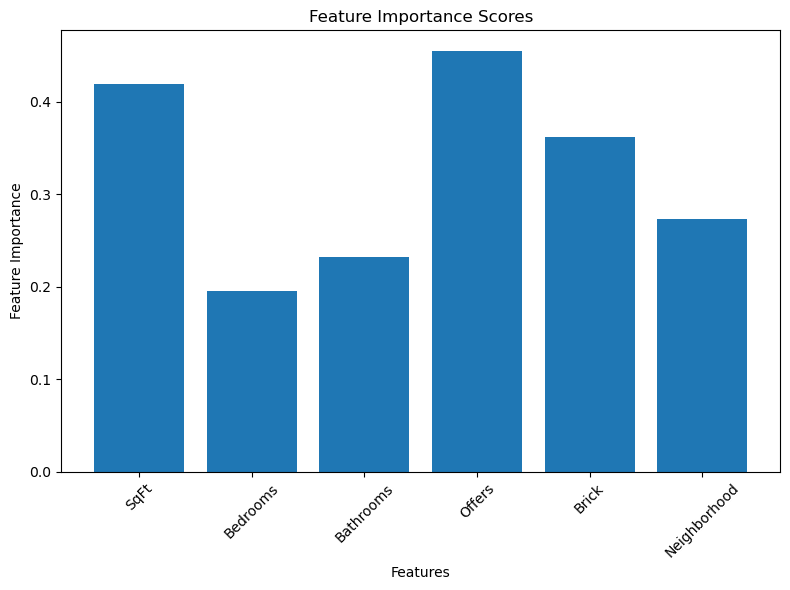

In [56]:
# Plot the feature importance
plt.figure(figsize=(8, 6))
plt.bar(X.columns, features_df.importance)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the plot it can be concluded that Offers is having the most significant impact on the linear regression model used for the prediction of house prices

## Task 5: Conclusion and Recommendations 

### Summary

**Data Preprocessing:**
1. There was no missing value.
2. There were no duplicates.
3. Outliers were handled.
4. Categorical values were encoded using One Hot Encoding
5. The dataset was split using training and test set

**Exploratory Data Analysis:**
1. Distribution of various numerical features were visualised using histograms.
2. Unique values in each categorical columns were explored.
3. Correlation between variables like positive correlation between SqFt and Prices was obtained using Correlation matrix.
4. Features having more influence were visualised and SqFt was found out to have greatest positive correlation with Prices.
5. Trends in Prices were observed.

**Model Building:**
1. Dataset was trained on Linear Regression, Decision Tree and Random Forest models.
2. The various metrics of the respective models were calculated.
3. Hyperparameter Tuning was performed on Decision Tree model and the error slightly reduced.
4. Based on root mean square error, Linear Regressor Model had minimal error and so it was selected for prediction.
5. Offers was having the most significant impact on the model.

### Strengths and limitations of the predictive model 

**Strengths:**

1. **Good Predictive Performance:** A low RMSE indicates that the model's predictions are close to the actual values on average which suggests that the Linear Regression model can make accurate predictions for the given dataset.

2. **Interpretability:** Linear Regression is a straightforward and interpretable model. It allows easy interpretability of coefficients of the features, making it possible to understand how each feature influences the target variable.

3. **Computational Efficiency:** Linear Regression is computationally efficient and can handle large datasets with many features    without significant computational burden.


**Limitations:**

1. **Sensitivity to Outliers:** Linear Regression is sensitive to outliers, which can heavily influence the model's coefficients and predictions. It may not perform well when outliers are present in the data.

2. **Assumption of Linearity:** Linear Regression assumes a linear relationship between the features and the target variable. If the relationship is non-linear, the model's performance may suffer, and it may not capture complex patterns in the data.

3. **Extrapolation:** Linear Regression is not suitable for extrapolation beyond the range of the training data. 

###  Recommendations for potential homebuyers or real estate professionals based on the model's insights. 

1. Utilize the Linear Regression model to estimate property prices based on relevant features such as SqFt, the number of bathrooms, bedrooms, and other significant factors.

2. The model's RMSE of 0.4866 suggests that, on average, its predictions are within approximately 0.4866 units of the actual prices.

3. The offers have more influence on the prices. More offers may shoot up prices